___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" 
alt="CLRSWY"></p>

## <p style="background-color:#FDFEFE; font-family:newtimeroman; color:#9d4f8c; font-size:100%; text-align:center; border-radius:10px 10px;">WAY TO REINVENT YOURSELF</p>

<img src=https://i.ibb.co/wJW61Y2/Used-cars.jpg width="700" height="200">

## <p style="background-color:#FDFEFE; font-family:newtimeroman; color:#060108; font-size:200%; text-align:center; border-radius:10px 10px;">The Capstone Project of Data Analytics Module</p>

## <p style="background-color:#FDFEFE; font-family:newtimeroman; color:#060108; font-size:150%; text-align:center; border-radius:10px 10px;">Car Price Prediction EDA</p>

# WELCOME!

## Introduction
Welcome to "***AutoScout Data Analysis Project***". This is the capstone project of ***Data Analysis*** Module. **Auto Scout** data which using for this project, scraped from the on-line car trading company in 2019, contains many features of 9 different car models. In this project, you will have the opportunity to apply many commonly used algorithms for Data Cleaning and Exploratory Data Analysis by using many Python libraries such as Numpy, Pandas, Matplotlib, Seaborn, Scipy you will analyze clean dataset.

The project consists of 3 parts:
* First part is related with 'data cleaning'. It deals with Incorrect Headers, Incorrect Format, Anomalies, Dropping useless columns.
* Second part is related with 'filling data'. It deals with Missing Values. Categorical to numeric transformation is done.
* Third part is related with 'handling outliers of data' via Visualisation libraries. Some insights are extracted.


# PART- 3 `( Handling With Outliers )`

In [1]:
import pandas as pd
import re
import numpy as np
import seaborn as sns
sns.set_style("whitegrid")

import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")

pd.set_option('display.float_format', lambda x: '%.1f' % x)
pd.options.display.max_rows=100
pd.options.display.max_columns=100

In [2]:
scout_car = pd.read_csv('zeromissvalue.csv')
df = scout_car.copy()
df.sample(3).T

,235,15063,12289
make_model,Audi A1,Renault Espace,Opel Insignia
body_type,Sedans,Van,Sedans
price,16490,24950,19450
vat,VAT deductible,VAT deductible,VAT deductible
km,16081.0,73598.0,13314.0
hp,70.0,118.0,103.0
type,Used,Used,Used
previous_owners,1.0,1.0,1.0
inspection_new,1,1,0
body_color,Blue,Brown,Black


In [3]:
df.columns

Index(['make_model', 'body_type', 'price', 'vat', 'km', 'hp', 'type',
       'previous_owners', 'inspection_new', 'body_color', 'upholstery',
       'nr_of_doors', 'nr_of_seats', 'gearing_type', 'displacement',
       'drive_chain', 'fuel', 'comfort_&_convenience', 'entertainment_&_media',
       'extras', 'safety_&_security', 'gears', 'age', 'consumption_comb'],
      dtype='object')

In [4]:
df.isnull().sum()*100/df.shape[0]

make_model              0.0
body_type               0.0
price                   0.0
vat                     0.0
km                      0.0
hp                      0.0
type                    0.0
previous_owners         0.0
inspection_new          0.0
body_color              0.0
upholstery              0.0
nr_of_doors             0.0
nr_of_seats             0.0
gearing_type            0.0
displacement            0.0
drive_chain             0.0
fuel                    0.0
comfort_&_convenience   0.0
entertainment_&_media   0.0
extras                  0.0
safety_&_security       0.0
gears                   0.0
age                     0.0
consumption_comb        0.0
dtype: float64

## DEF

In [5]:
def fill_most(df, group_col, col_name):
    for group in list(df[group_col].unique()) :
        cond = df[group_col] == group
        mode = list(df[cond][col_name].mode())
        if mode != [] :
            df.loc[cond,col_name] = df.loc[cond,col_name].fillna(df[cond][col_name].mode()[0])
        else :
            df.loc[cond,col_name] = df.loc[cond,col_name].fillna(df[col_name].mode()[0])

## body type

In [6]:
df["body_type"].value_counts(dropna = False)

Sedans           7925
Station wagon    3563
Compact          3155
Van               809
Other             290
Transporter        88
Off-Road           56
Coupe              25
Convertible         8
Name: body_type, dtype: int64

In [7]:
df["body_type"][df["body_type"]=="Other"] = np.nan

In [8]:
fill_most(df, "make_model", "body_type")

In [9]:
df["body_type"].value_counts(dropna = False)

Sedans           8005
Station wagon    3678
Compact          3242
Van               817
Transporter        88
Off-Road           56
Coupe              25
Convertible         8
Name: body_type, dtype: int64

<AxesSubplot:xlabel='body_type', ylabel='count'>

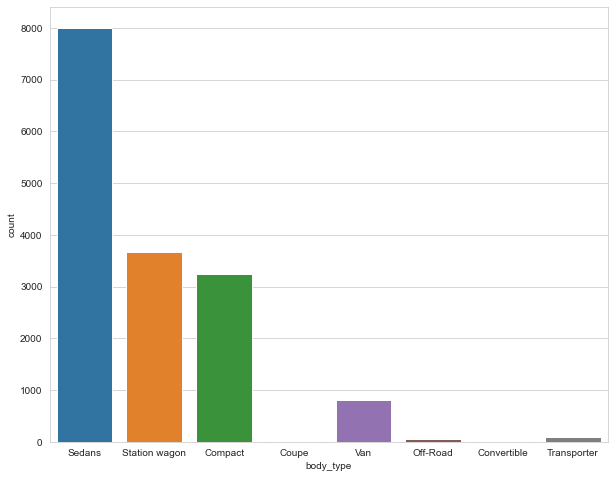

In [10]:
plt.figure(figsize=(10,8))
sns.countplot(x="body_type",data=df)

## Vat

In [11]:
df["vat"].value_counts(dropna = False)

VAT deductible      15048
Price negotiable      871
Name: vat, dtype: int64

<AxesSubplot:xlabel='vat', ylabel='count'>

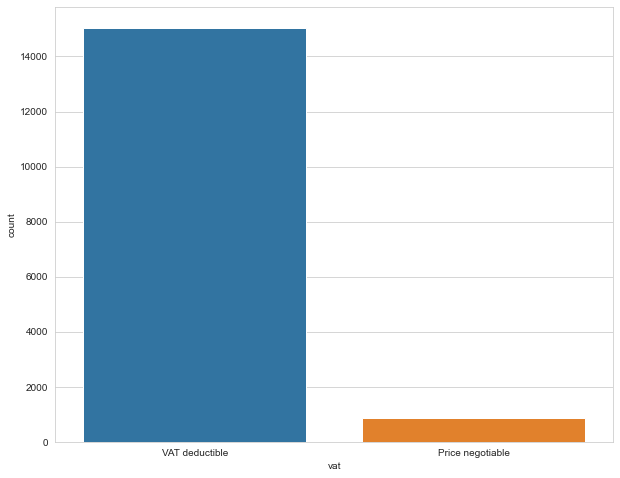

In [12]:
plt.figure(figsize=(10,8))
sns.countplot(x="vat",data=df)

## km

In [13]:
## km çok değişkenli oldugundan outliner var diyemeyiz bir insan 1 yılda 10km de gulanır 100000km de

In [14]:
df["km"].value_counts(dropna = False)

10.0       2021
1.0         385
5.0         170
50.0        148
100.0       139
           ... 
67469.0       1
43197.0       1
10027.0       1
35882.0       1
57.0          1
Name: km, Length: 6689, dtype: int64

<AxesSubplot:ylabel='km'>

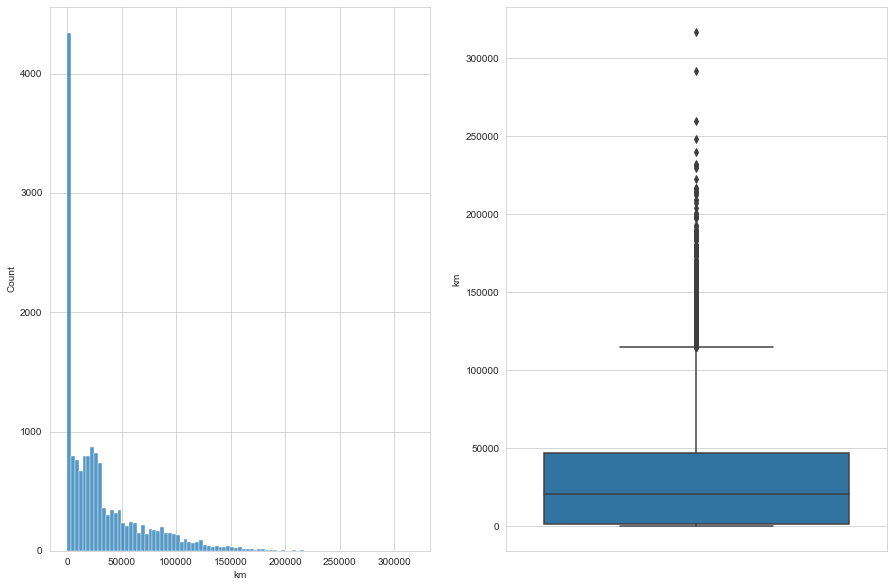

In [15]:
plt.figure(figsize=(15,10))
plt.subplot(1,2,1)
sns.histplot(x="km",data=df)

plt.subplot(1,2,2)
sns.boxplot(y="km",data=df)


## hp

In [16]:
## Alan araştırması yapıldı ve outliner gozuken arabaların aslında gerçektede var olduğu bulundu.

In [17]:
df["hp"].value_counts(dropna = False)

85.0     2544
66.0     2131
81.0     1402
100.0    1308
110.0    1112
70.0      890
125.0     707
51.0      695
55.0      569
118.0     552
92.0      475
121.0     406
147.0     380
77.0      353
56.0      316
54.0      276
103.0     253
87.0      232
165.0     194
88.0      177
60.0      160
162.0      98
74.0       81
96.0       72
71.0       59
101.0      47
67.0       40
154.0      39
122.0      35
119.0      30
164.0      27
135.0      24
82.0       22
52.0       22
78.0       20
294.0      18
146.0      18
141.0      16
57.0       10
104.0       8
120.0       8
191.0       7
112.0       7
155.0       6
117.0       6
184.0       5
76.0        4
90.0        4
65.0        4
98.0        3
168.0       3
149.0       3
80.0        3
93.0        3
143.0       2
86.0        2
140.0       2
150.0       2
228.0       2
270.0       2
53.0        2
167.0       2
63.0        2
40.0        2
127.0       2
89.0        2
123.0       1
84.0        1
239.0       1
44.0        1
137.0       1
163.0 

<AxesSubplot:ylabel='hp'>

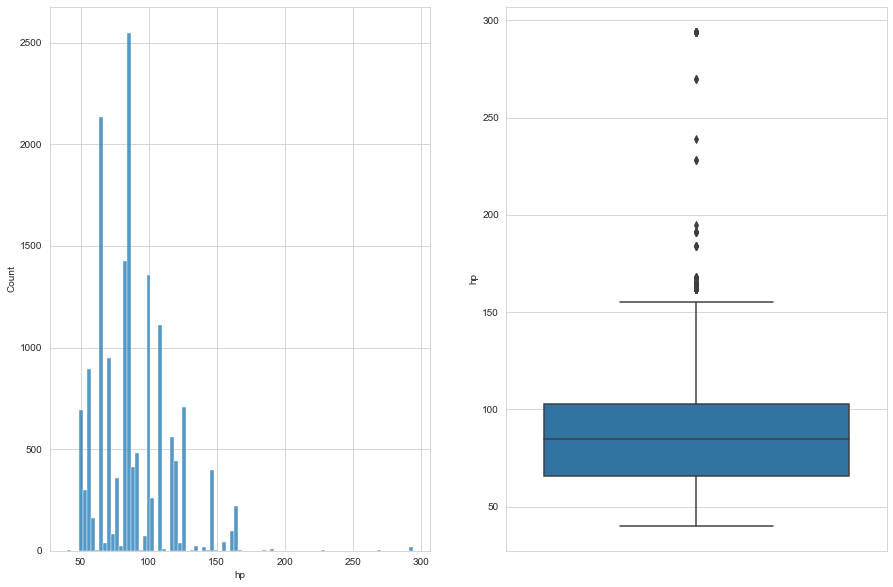

In [18]:
plt.figure(figsize=(15,10))
plt.subplot(1,2,1)
sns.histplot(x="hp",data=df)

plt.subplot(1,2,2)
sns.boxplot(y="hp",data=df)

<AxesSubplot:ylabel='hp'>

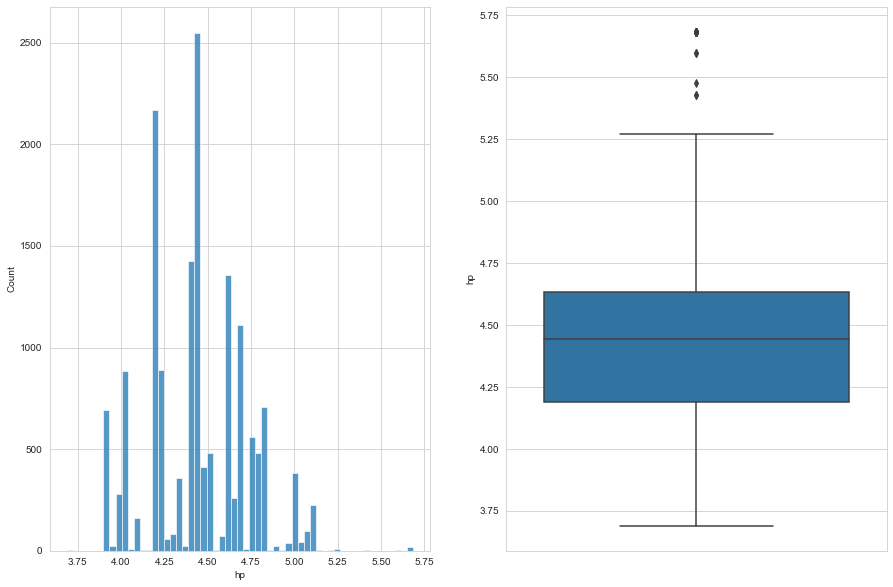

In [19]:
plt.figure(figsize=(15,10))
plt.subplot(1,2,1)
sns.histplot(x=np.log(df["hp"]),data=df)

plt.subplot(1,2,2)
sns.boxplot(y=np.log(df["hp"]),data=df)

In [20]:
np.log(df["hp"].describe())

count   9.7
mean    4.5
std     3.3
min     3.7
25%     4.2
50%     4.4
75%     4.6
max     5.7
Name: hp, dtype: float64

In [21]:
a = np.log(df["hp"])

In [22]:
a[a > 5.3] 

3587    5.7
3590    5.7
3592    5.7
3593    5.7
3594    5.4
3595    5.7
3596    5.7
3597    5.4
3598    5.7
3599    5.7
3600    5.7
3601    5.7
3602    5.7
3603    5.7
3604    5.7
3605    5.7
3606    5.7
3608    5.6
3609    5.6
3610    5.7
3648    5.7
3649    5.7
10513   5.5
Name: hp, dtype: float64

In [23]:
df[df["hp"].index == 15915]

,make_model,body_type,price,vat,km,hp,type,previous_owners,inspection_new,body_color,upholstery,nr_of_doors,nr_of_seats,gearing_type,displacement,drive_chain,fuel,comfort_&_convenience,entertainment_&_media,extras,safety_&_security,gears,age,consumption_comb
15915,Renault Espace,Van,39885,VAT deductible,9900.0,165.0,Used,1.0,0,Grey,Cloth,5.0,5.0,Automatic,1798.0,front,Benzine,"Air conditioning,Automatic climate control,Cru...","Bluetooth,Digital radio,Hands-free equipment,R...","Alloy wheels,Touch screen,Voice Control","ABS,Adaptive Cruise Control,Blind spot monitor...",7.0,1.0,4.7


In [24]:
df[df["hp"]> 165]

,make_model,body_type,price,vat,km,hp,type,previous_owners,inspection_new,body_color,upholstery,nr_of_doors,nr_of_seats,gearing_type,displacement,drive_chain,fuel,comfort_&_convenience,entertainment_&_media,extras,safety_&_security,gears,age,consumption_comb
3587,Audi A3,Sedans,64900,VAT deductible,35000.0,294.0,Used,1.0,0,Grey,"Cloth, Black",5.0,5.0,Semi-automatic,2480.0,front,Benzine,"Air conditioning,Seat ventilation,Split rear s...",Radio,Alloy wheels,"Adaptive Cruise Control,Alarm system,Central d...",7.0,2.0,8.3
3590,Audi A3,Sedans,62900,VAT deductible,700.0,294.0,Used,1.0,0,Grey,"Cloth, Black",5.0,5.0,Semi-automatic,2480.0,front,Benzine,"Air conditioning,Seat ventilation,Split rear s...","Bluetooth,Radio",Alloy wheels,"ABS,Adaptive Cruise Control,Alarm system,Centr...",7.0,1.0,8.3
3592,Audi A3,Sedans,56900,VAT deductible,5200.0,294.0,Used,1.0,0,Grey,"Full leather, Black",5.0,5.0,Semi-automatic,2480.0,4WD,Benzine,"Air conditioning,Air suspension,Armrest,Automa...","Bluetooth,CD player,Digital radio,Hands-free e...","Alloy wheels,Shift paddles,Sport package,Sport...","ABS,Adaptive Cruise Control,Adaptive headlight...",7.0,2.0,8.3
3593,Audi A3,Sedans,58500,VAT deductible,10000.0,294.0,Used,1.0,0,White,"Cloth, Black",5.0,5.0,Semi-automatic,2480.0,front,Benzine,"Air conditioning,Seat ventilation,Split rear s...",Radio,Alloy wheels,"Adaptive Cruise Control,Alarm system,Central d...",7.0,2.0,8.3
3594,Audi A3,Sedans,58990,VAT deductible,7500.0,228.0,Used,1.0,0,Blue,"Full leather, Black",5.0,5.0,Semi-automatic,1984.0,4WD,Benzine,"Air conditioning,Automatic climate control,Cru...","Bluetooth,CD player,Hands-free equipment,On-bo...","Alloy wheels,Sport package,Sport seats,Sport s...","ABS,Adaptive Cruise Control,Adaptive headlight...",7.0,2.0,6.5
3595,Audi A3,Station wagon,63900,VAT deductible,10.0,294.0,Used,1.0,0,Black,"Part leather, Black",5.0,5.0,Semi-automatic,2480.0,front,Benzine,"Air conditioning,Armrest,Automatic climate con...","Bluetooth,CD player,Digital radio,Hands-free e...","Alloy wheels,Shift paddles,Ski bag,Sport packa...","ABS,Adaptive Cruise Control,Adaptive headlight...",7.0,1.0,8.3
3596,Audi A3,Sedans,57400,Price negotiable,63000.0,294.0,Used,1.0,0,Blue,"Full leather, Black",5.0,5.0,Semi-automatic,2480.0,4WD,Benzine,"Air conditioning,Air suspension,Armrest,Automa...","Bluetooth,CD player,Hands-free equipment,On-bo...","Alloy wheels,Sport seats,Sport suspension,Tune...","ABS,Adaptive Cruise Control,Adaptive headlight...",7.0,2.0,8.3
3597,Audi A3,Convertible,56100,VAT deductible,8364.0,228.0,Used,1.0,0,Blue,"Part leather, Black",2.0,5.0,Semi-automatic,1984.0,4WD,Benzine,"Air conditioning,Armrest,Automatic climate con...","CD player,On-board computer,Radio","Alloy wheels,Shift paddles,Sport seats,Sport s...","ABS,Alarm system,Central door lock,Driver-side...",7.0,2.0,7.1
3598,Audi A3,Sedans,55000,VAT deductible,24000.0,294.0,Used,1.0,0,Black,"Cloth, Black",5.0,5.0,Semi-automatic,2480.0,front,Benzine,"Air conditioning,Seat ventilation,Split rear s...",Radio,Alloy wheels,"Adaptive Cruise Control,Alarm system,Central d...",7.0,3.0,8.3
3599,Audi A3,Sedans,55000,VAT deductible,30000.0,294.0,Used,1.0,0,Grey,"Cloth, Black",4.0,5.0,Semi-automatic,2480.0,front,Benzine,"Air conditioning,Seat ventilation,Split rear s...",Radio,Alloy wheels,"Adaptive Cruise Control,Alarm system,Central d...",7.0,2.0,8.3


## type

In [25]:
#string oldugundan outlinerlerle mucadele yapılmasına gerek yok numerik veriler ile yapılabılır.

In [26]:
df.type.value_counts(dropna = False)

Used    12905
New      3014
Name: type, dtype: int64

<AxesSubplot:xlabel='type', ylabel='count'>

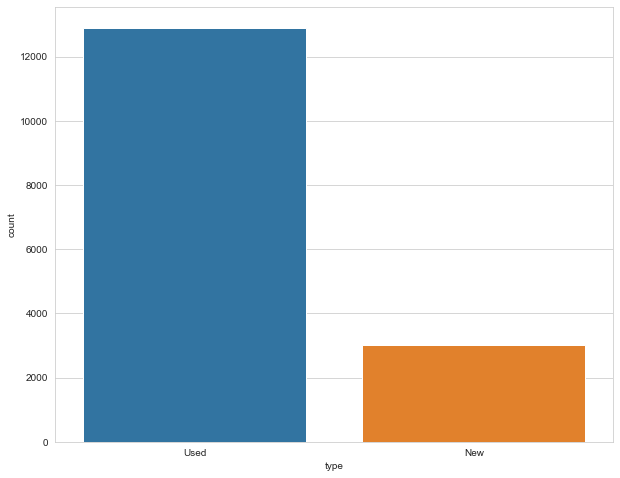

In [27]:
plt.figure(figsize=(10,8))
sns.countplot(x="type",data=df)

## previous_owners

In [28]:
## sıralı değerlerde outliner zaten olamaz.

In [29]:
df["previous_owners"].value_counts(dropna = False)

1.0    14169
2.0     1179
0.0      531
3.0       38
4.0        2
Name: previous_owners, dtype: int64

<AxesSubplot:ylabel='previous_owners'>

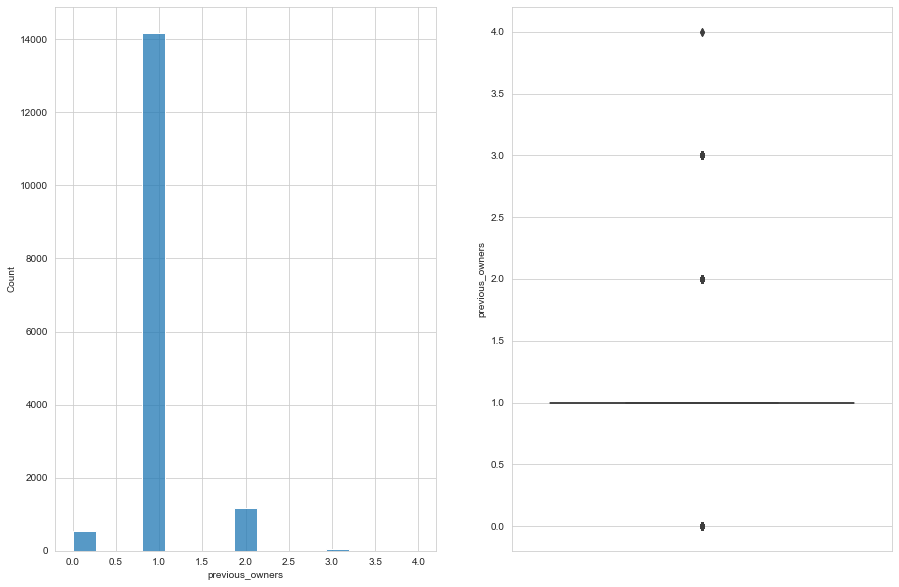

In [30]:
plt.figure(figsize=(15,10))
plt.subplot(1,2,1)
sns.histplot(x="previous_owners",data=df)

plt.subplot(1,2,2)
sns.boxplot(y="previous_owners",data=df)

## inspection_new

In [31]:
## sıralı değerlerde outliner zaten olamaz.

In [32]:
df["inspection_new"].value_counts(dropna = False)

0    12349
1     3570
Name: inspection_new, dtype: int64

<AxesSubplot:ylabel='inspection_new'>

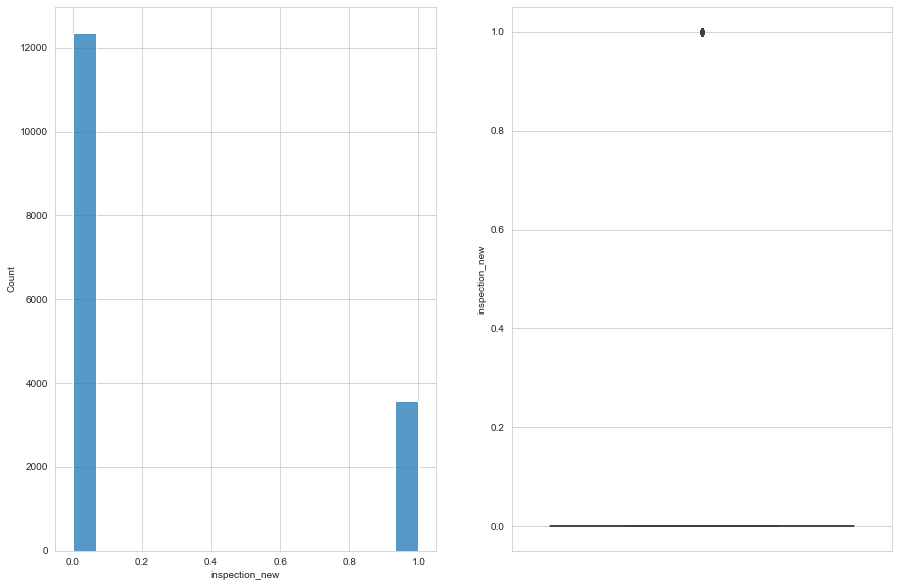

In [33]:
plt.figure(figsize=(15,10))
plt.subplot(1,2,1)
sns.histplot(x="inspection_new",data=df)

plt.subplot(1,2,2)
sns.boxplot(y="inspection_new",data=df)

## body_color

In [34]:
df["body_color"].value_counts(dropna = False)

Black     3888
Grey      3638
White     3540
Silver    1687
Blue      1524
Red        989
Brown      299
Green      163
Beige      108
Yellow      53
Violet      18
Bronze       7
Orange       3
Gold         2
Name: body_color, dtype: int64

<AxesSubplot:xlabel='body_color', ylabel='count'>

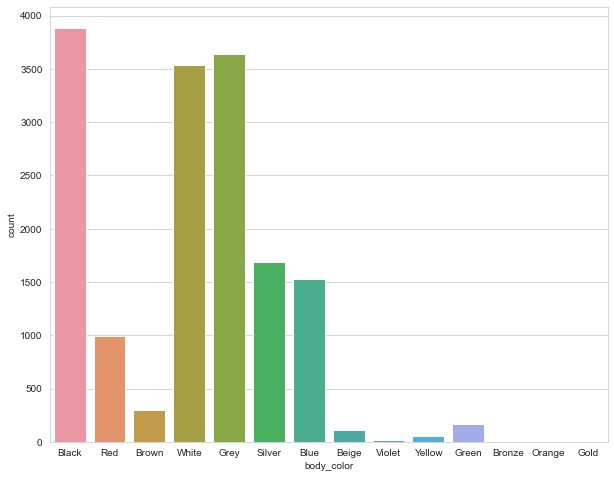

In [35]:
plt.figure(figsize=(10,8))
sns.countplot(x="body_color",data=df)

## upholstery

In [36]:
df["upholstery"].value_counts(dropna = False)

Cloth, Black           8946
Part leather, Black    1174
Cloth                  1011
Cloth, Grey             907
Black                   693
Cloth, Other            639
Full leather, Black     575
Full leather, Brown     416
Grey                    273
Other, Other            182
Part leather            140
Full leather            139
Part leather, Grey      116
Other, Black            110
Full leather, Grey       83
Full leather, Other      72
Part leather, Other      66
Other                    56
Part leather, Brown      50
alcantara, Black         47
Full leather, Beige      37
Velour, Black            36
Cloth, Brown             28
Velour                   16
Other, Grey              15
Cloth, Beige             13
Cloth, Blue              12
Brown                    12
Velour, Grey              8
Cloth, White              8
alcantara, Grey           6
Cloth, Red                5
Other, Yellow             4
Part leather, Red         3
Beige                     3
Part leather, White 

In [37]:
df["upholstery"] = df["upholstery"].str.split(",")
df["upholstery"] = df["upholstery"].str[0]

In [38]:
df["upholstery"].value_counts(dropna = False)

Cloth           11570
Part leather     1553
Full leather     1326
Black             693
Other             368
Grey              273
Velour             60
alcantara          57
Brown              12
Beige               3
Blue                2
White               2
Name: upholstery, dtype: int64

In [39]:
u_type=['Part leather','Full leather','Velour','alcantara','Other']
df['upholstery'] = df['upholstery'].apply(lambda x:  'Part/Full Leather' if x in u_type else 'Cloth')
df['upholstery']

0                    Cloth
1                    Cloth
2                    Cloth
3                    Cloth
4                    Cloth
               ...        
15914    Part/Full Leather
15915                Cloth
15916    Part/Full Leather
15917    Part/Full Leather
15918    Part/Full Leather
Name: upholstery, Length: 15919, dtype: object

In [40]:
df["upholstery"].value_counts(dropna = False)

Cloth                12555
Part/Full Leather     3364
Name: upholstery, dtype: int64

<AxesSubplot:xlabel='upholstery', ylabel='count'>

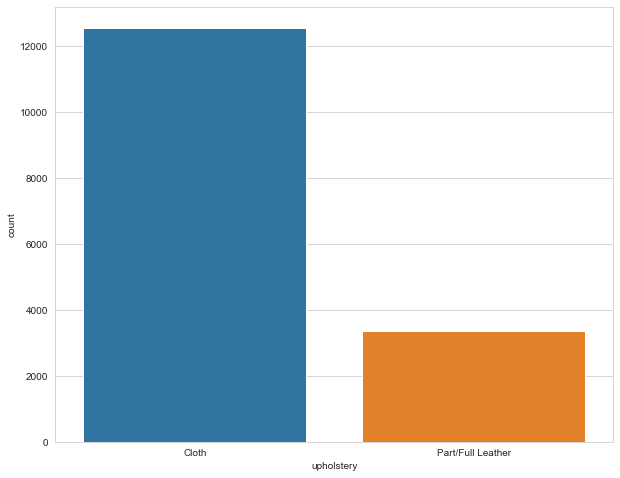

In [41]:
plt.figure(figsize=(10,8))
sns.countplot(x="upholstery",data=df)

## nr_of_doors             

In [42]:
df["nr_of_doors"].value_counts(dropna = False)

5.0    11787
4.0     3079
3.0      832
2.0      219
1.0        1
7.0        1
Name: nr_of_doors, dtype: int64

<AxesSubplot:ylabel='nr_of_doors'>

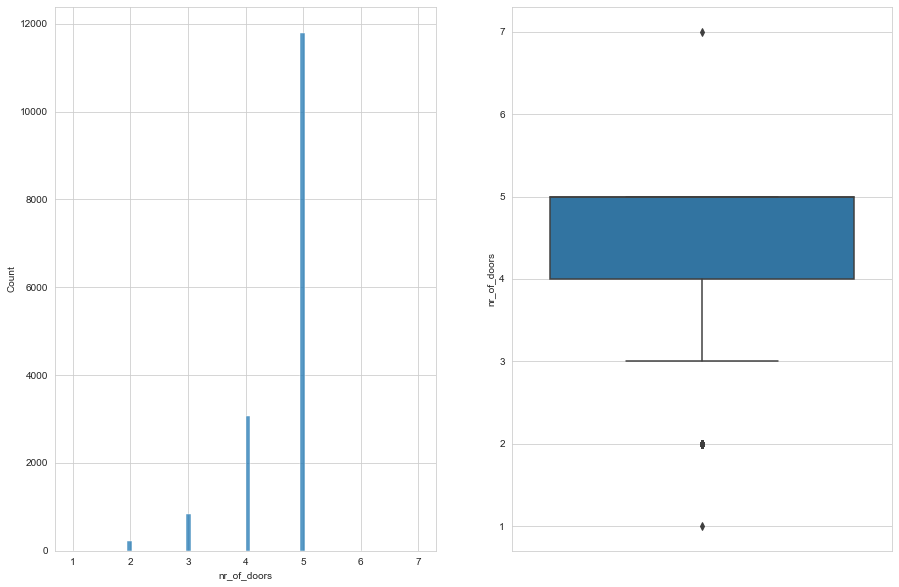

In [43]:
plt.figure(figsize=(15,10))
plt.subplot(1,2,1)
sns.histplot(x="nr_of_doors",data=df)

plt.subplot(1,2,2)
sns.boxplot(y="nr_of_doors",data=df)

In [44]:
df["nr_of_doors"].describe()

count   15919.0
mean        4.7
std         0.6
min         1.0
25%         4.0
50%         5.0
75%         5.0
max         7.0
Name: nr_of_doors, dtype: float64

In [45]:
df[df['nr_of_doors'] == 7]
df['nr_of_doors'][df['nr_of_doors'].index == 15202] = 5

In [46]:
df[(df['body_type'] == "Van")&(df['make_model']=="Renault Espace")]

,make_model,body_type,price,vat,km,hp,type,previous_owners,inspection_new,body_color,upholstery,nr_of_doors,nr_of_seats,gearing_type,displacement,drive_chain,fuel,comfort_&_convenience,entertainment_&_media,extras,safety_&_security,gears,age,consumption_comb
14928,Renault Espace,Van,17500,VAT deductible,141000.0,118.0,Used,1.0,0,White,Part/Full Leather,5.0,5.0,Automatic,1598.0,front,Diesel,Air conditioning,"Bluetooth,Hands-free equipment,On-board comput...",Alloy wheels,"ABS,Central door lock,Daytime running lights,D...",6.0,4.0,4.6
14931,Renault Espace,Van,17990,VAT deductible,109745.0,118.0,Used,1.0,0,Black,Part/Full Leather,5.0,7.0,Automatic,1598.0,front,Diesel,Cruise control,"Bluetooth,Hands-free equipment,On-board comput...",Alloy wheels,"ABS,Driver-side airbag,Passenger-side airbag,S...",6.0,4.0,4.6
14932,Renault Espace,Van,22600,VAT deductible,100000.0,118.0,Used,1.0,0,Brown,Part/Full Leather,5.0,7.0,Automatic,1598.0,front,Diesel,"Air conditioning,Armrest,Automatic climate con...","Bluetooth,CD player,Hands-free equipment,MP3,O...","Alloy wheels,Shift paddles,Sport seats,Voice C...","ABS,Adaptive Cruise Control,Adaptive headlight...",6.0,4.0,4.7
14934,Renault Espace,Van,22690,Price negotiable,68021.0,119.0,Used,1.0,0,Grey,Part/Full Leather,5.0,5.0,Automatic,1598.0,front,Diesel,"Air conditioning,Automatic climate control,Cru...","Bluetooth,Hands-free equipment,On-board comput...",Alloy wheels,"ABS,Central door lock,Daytime running lights,D...",6.0,4.0,4.7
14935,Renault Espace,Van,22500,Price negotiable,32559.0,118.0,Used,1.0,0,Bronze,Part/Full Leather,5.0,5.0,Automatic,1598.0,front,Diesel,"Air conditioning,Armrest,Automatic climate con...","Bluetooth,Digital radio,Hands-free equipment,M...","Alloy wheels,Sport package,Touch screen,Voice ...","ABS,Adaptive Cruise Control,Alarm system,Centr...",6.0,4.0,4.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15914,Renault Espace,Van,39950,VAT deductible,10.0,147.0,New,1.0,0,Grey,Part/Full Leather,5.0,5.0,Automatic,1997.0,front,Diesel,"Air conditioning,Automatic climate control,Cru...","Bluetooth,Digital radio,Hands-free equipment,O...","Alloy wheels,Touch screen","ABS,Central door lock,Central door lock with r...",6.0,1.0,5.3
15915,Renault Espace,Van,39885,VAT deductible,9900.0,165.0,Used,1.0,0,Grey,Cloth,5.0,5.0,Automatic,1798.0,front,Benzine,"Air conditioning,Automatic climate control,Cru...","Bluetooth,Digital radio,Hands-free equipment,R...","Alloy wheels,Touch screen,Voice Control","ABS,Adaptive Cruise Control,Blind spot monitor...",7.0,1.0,4.7
15916,Renault Espace,Van,39875,VAT deductible,15.0,146.0,New,1.0,1,White,Part/Full Leather,5.0,7.0,Automatic,1997.0,front,Diesel,"Air conditioning,Armrest,Automatic climate con...","Bluetooth,Hands-free equipment,On-board comput...",Alloy wheels,"ABS,Adaptive Cruise Control,Blind spot monitor...",6.0,1.0,5.3
15917,Renault Espace,Van,39700,VAT deductible,10.0,147.0,New,1.0,0,Grey,Part/Full Leather,5.0,7.0,Automatic,1997.0,front,Diesel,"Air conditioning,Automatic climate control,Cru...","Bluetooth,Digital radio,Radio,USB","Alloy wheels,Touch screen","ABS,Blind spot monitor,Driver-side airbag,Elec...",6.0,1.0,5.3


In [47]:
df[df['nr_of_doors'] == 1]

,make_model,body_type,price,vat,km,hp,type,previous_owners,inspection_new,body_color,upholstery,nr_of_doors,nr_of_seats,gearing_type,displacement,drive_chain,fuel,comfort_&_convenience,entertainment_&_media,extras,safety_&_security,gears,age,consumption_comb
13782,Renault Clio,Compact,8500,VAT deductible,41493.0,55.0,Used,1.0,0,White,Cloth,1.0,5.0,Manual,1461.0,front,Diesel,"Cruise control,Electrical side mirrors,Power w...","Bluetooth,Hands-free equipment,On-board comput...",Alloy wheels,"ABS,Central door lock,Daytime running lights,D...",5.0,4.0,3.3


In [48]:
df[df["make_model"]=="Renault Clio"]["nr_of_doors"].value_counts()

5.0    1566
4.0     272
1.0       1
Name: nr_of_doors, dtype: int64

In [49]:
df[df['nr_of_doors'] == 1]
df['nr_of_doors'][df['nr_of_doors'].index == 13782] = 5

In [50]:
df[df['nr_of_doors'] == 2] ## alan bilgisi yüzünden dokunmadık

,make_model,body_type,price,vat,km,hp,type,previous_owners,inspection_new,body_color,upholstery,nr_of_doors,nr_of_seats,gearing_type,displacement,drive_chain,fuel,comfort_&_convenience,entertainment_&_media,extras,safety_&_security,gears,age,consumption_comb
26,Audi A1,Compact,11444,VAT deductible,84029.0,70.0,Used,1.0,1,Blue,Cloth,2.0,4.0,Manual,999.0,front,Benzine,"Air conditioning,Automatic climate control,Ele...","Bluetooth,CD player,Hands-free equipment,MP3,O...","Alloy wheels,Voice Control","ABS,Central door lock,Daytime running lights,D...",6.0,4.0,4.2
44,Audi A1,Sedans,11490,VAT deductible,44120.0,66.0,Used,1.0,0,Black,Cloth,2.0,5.0,Manual,1422.0,front,Diesel,"Air conditioning,Cruise control,Electrical sid...","Bluetooth,Hands-free equipment,MP3,On-board co...",Alloy wheels,"ABS,Central door lock,Daytime running lights,D...",6.0,4.0,3.6
48,Audi A1,Compact,11490,VAT deductible,58000.0,60.0,Used,2.0,1,Black,Part/Full Leather,2.0,4.0,Manual,999.0,front,Benzine,"Air conditioning,Electrical side mirrors,Leath...","Bluetooth,CD player","Alloy wheels,Sport seats,Sport suspension","ABS,Central door lock,Daytime running lights,D...",6.0,4.0,4.4
55,Audi A1,Compact,10999,VAT deductible,69500.0,70.0,Used,1.0,0,Black,Part/Full Leather,2.0,4.0,Manual,999.0,front,Benzine,"Air conditioning,Armrest,Automatic climate con...",CD player,Alloy wheels,"ABS,Central door lock,Daytime running lights,D...",6.0,3.0,4.4
56,Audi A1,Compact,10900,VAT deductible,43500.0,60.0,Used,1.0,0,White,Cloth,2.0,4.0,Manual,999.0,front,Benzine,"Air conditioning,Electrical side mirrors,Power...","CD player,On-board computer,Radio",Alloy wheels,"ABS,Central door lock,Daytime running lights,D...",6.0,4.0,4.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10304,Opel Corsa,Compact,10499,VAT deductible,325.0,51.0,New,1.0,0,Red,Cloth,2.0,4.0,Manual,1229.0,front,Benzine,"Air conditioning,Electrical side mirrors,Power...",Radio,Alloy wheels,"ABS,Central door lock,Daytime running lights,D...",5.0,1.0,5.4
10314,Opel Corsa,Compact,9990,VAT deductible,100.0,51.0,New,1.0,0,Blue,Cloth,2.0,5.0,Manual,1229.0,front,Benzine,"Air conditioning,Electrical side mirrors,Hill ...","Bluetooth,CD player,Hands-free equipment,On-bo...",Voice Control,"ABS,Central door lock,Daytime running lights,D...",5.0,1.0,5.4
10380,Opel Corsa,Compact,11290,VAT deductible,12.0,51.0,New,1.0,0,Red,Cloth,2.0,5.0,Manual,1229.0,front,Benzine,"Air conditioning,Electrical side mirrors,Power...","Bluetooth,Hands-free equipment,Radio",Alloy wheels,"ABS,Central door lock,Daytime running lights,D...",5.0,1.0,5.4
10413,Opel Corsa,Compact,11190,VAT deductible,10.0,51.0,New,1.0,0,Blue,Cloth,2.0,5.0,Manual,1229.0,front,Benzine,"Air conditioning,Electrical side mirrors,Hill ...","Radio,Sound system",Alloy wheels,"ABS,Central door lock,Daytime running lights,D...",5.0,1.0,5.4


<AxesSubplot:ylabel='nr_of_doors'>

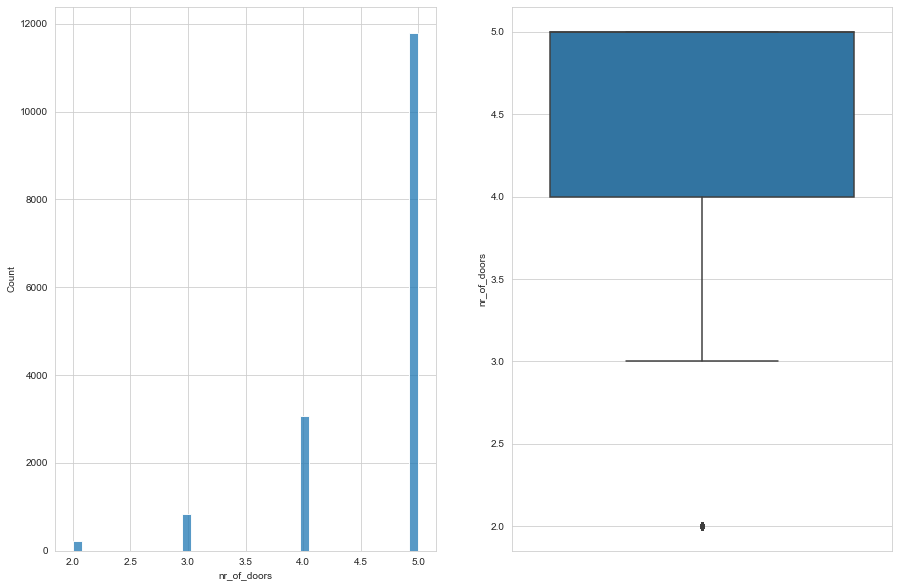

In [51]:
plt.figure(figsize=(15,10))
plt.subplot(1,2,1)
sns.histplot(x="nr_of_doors",data=df)

plt.subplot(1,2,2)
sns.boxplot(y="nr_of_doors",data=df)

## nr_of_seats

In [52]:
df.nr_of_seats.value_counts(dropna=False)

5.0    14313
4.0     1125
7.0      362
2.0      116
6.0        2
3.0        1
Name: nr_of_seats, dtype: int64

<AxesSubplot:ylabel='nr_of_seats'>

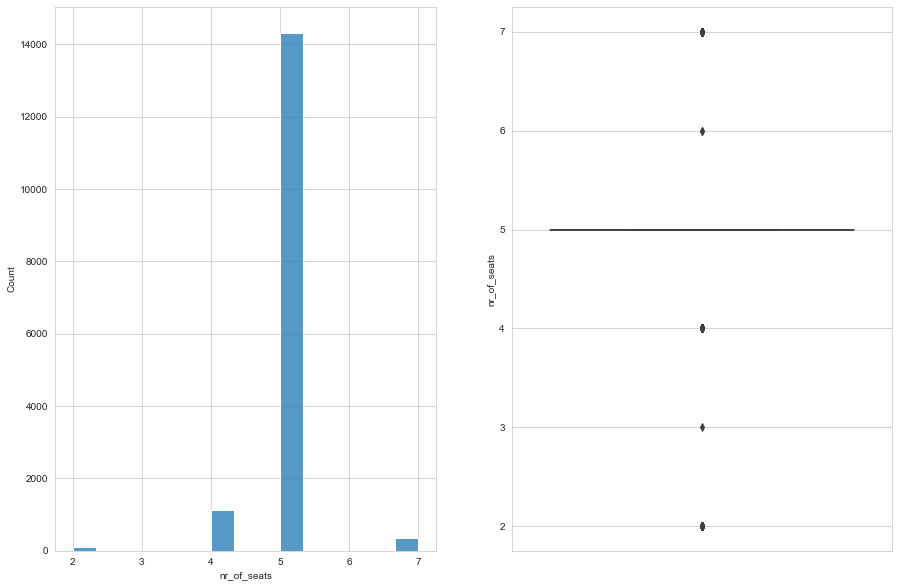

In [53]:
plt.figure(figsize=(15,10))
plt.subplot(1,2,1)
sns.histplot(x="nr_of_seats",data=df)

plt.subplot(1,2,2)
sns.boxplot(y="nr_of_seats",data=df)

In [54]:
df[df["nr_of_seats"]==6]

,make_model,body_type,price,vat,km,hp,type,previous_owners,inspection_new,body_color,upholstery,nr_of_doors,nr_of_seats,gearing_type,displacement,drive_chain,fuel,comfort_&_convenience,entertainment_&_media,extras,safety_&_security,gears,age,consumption_comb
582,Audi A1,Compact,13500,VAT deductible,100000.0,70.0,Used,1.0,0,White,Cloth,5.0,6.0,Manual,1000.0,front,Benzine,Air conditioning,On-board computer,Alloy wheels,ABS,5.0,3.0,4.8
15890,Renault Espace,Station wagon,42490,VAT deductible,10.0,147.0,New,1.0,0,Black,Cloth,5.0,6.0,Automatic,1997.0,front,Diesel,"Air conditioning,Armrest,Automatic climate con...","Bluetooth,Hands-free equipment,On-board comput...","Alloy wheels,Touch screen","ABS,Blind spot monitor,Central door lock,Dayti...",6.0,1.0,5.7


In [55]:
df['nr_of_seats'][df['nr_of_seats'].index == 582] = 5
df['nr_of_seats'][df['nr_of_seats'].index == 15890] = 5

In [56]:
df[df["nr_of_seats"]==6]

,make_model,body_type,price,vat,km,hp,type,previous_owners,inspection_new,body_color,upholstery,nr_of_doors,nr_of_seats,gearing_type,displacement,drive_chain,fuel,comfort_&_convenience,entertainment_&_media,extras,safety_&_security,gears,age,consumption_comb


In [57]:
df[df['nr_of_seats'] == 3]

,make_model,body_type,price,vat,km,hp,type,previous_owners,inspection_new,body_color,upholstery,nr_of_doors,nr_of_seats,gearing_type,displacement,drive_chain,fuel,comfort_&_convenience,entertainment_&_media,extras,safety_&_security,gears,age,consumption_comb
1636,Audi A1,Compact,23090,VAT deductible,9821.0,141.0,Used,1.0,1,Black,Part/Full Leather,2.0,3.0,Automatic,1798.0,front,Benzine,"Air conditioning,Armrest,Automatic climate con...","Bluetooth,CD player,Digital radio,Hands-free e...","Alloy wheels,Catalytic Converter,Sport package...","ABS,Central door lock,Daytime running lights,D...",7.0,2.0,5.8


In [58]:
df['nr_of_seats'][df['nr_of_seats'].index == 1636] = 5

In [59]:
df.nr_of_seats.value_counts(dropna=False)

5.0    14316
4.0     1125
7.0      362
2.0      116
Name: nr_of_seats, dtype: int64

<AxesSubplot:xlabel='nr_of_seats', ylabel='Count'>

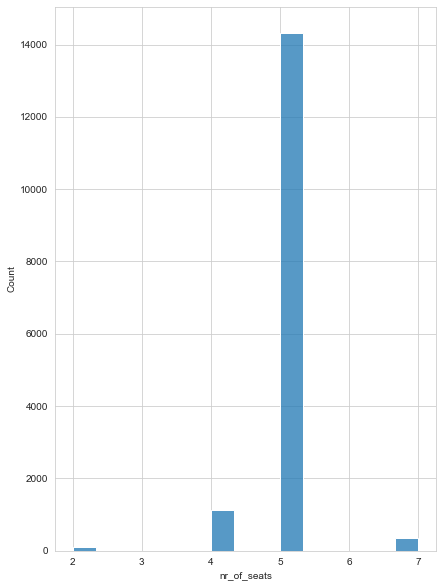

In [60]:
plt.figure(figsize=(15,10))
plt.subplot(1,2,1)
sns.histplot(x="nr_of_seats",data=df,)

## gearing_type

In [61]:
df.gearing_type.value_counts(dropna=False)

Manual            8153
Automatic         7297
Semi-automatic     469
Name: gearing_type, dtype: int64

<AxesSubplot:xlabel='gearing_type', ylabel='count'>

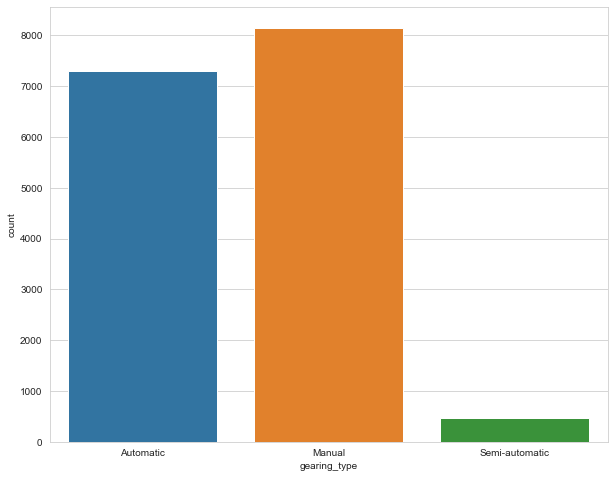

In [62]:
plt.figure(figsize=(10,8))
sns.countplot(x="gearing_type",data=df)

## displacement

In [63]:
## sorun yok olabılecek motor hacmı

In [64]:
df.displacement.value_counts(dropna=False)

1598.0     5063
999.0      2467
1398.0     1388
1399.0      749
1461.0      686
1229.0      677
1956.0      670
1490.0      559
1422.0      467
1197.0      353
898.0       351
1395.0      320
1968.0      301
1149.0      288
1618.0      212
1798.0      210
1498.0      196
1600.0      130
1248.0      110
1997.0      103
1364.0      102
1400.0       90
998.0        72
1500.0       50
2000.0       46
1000.0       40
1.0          36
1998.0       25
2480.0       20
1200.0       18
1984.0       18
1397.0       11
899.0        11
160.0         6
929.0         5
1499.0        5
997.0         4
1596.0        4
139.0         4
900.0         4
1599.0        3
1199.0        3
1396.0        3
1495.0        2
1589.0        2
1300.0        2
2.0           2
995.0         2
1496.0        1
890.0         1
1580.0        1
1995.0        1
1333.0        1
54.0          1
1533.0        1
1100.0        1
1350.0        1
16000.0       1
1856.0        1
1568.0        1
1896.0        1
1584.0        1
996.0   

In [65]:
df.displacement.describe()

count   15919.0
mean     1426.2
std       329.7
min         1.0
25%      1229.0
50%      1461.0
75%      1598.0
max     16000.0
Name: displacement, dtype: float64

In [66]:
df.displacement.sort_values().head(55)

14315     1.0
12800     1.0
12798     1.0
12796     1.0
12484     1.0
12790     1.0
12786     1.0
12783     1.0
14327     1.0
12781     1.0
14326     1.0
14325     1.0
12769     1.0
12815     1.0
14324     1.0
12768     1.0
12750     1.0
14322     1.0
14321     1.0
12670     1.0
12604     1.0
14320     1.0
12467     1.0
12473     1.0
12554     1.0
12501     1.0
12499     1.0
14319     1.0
12823     1.0
14328     1.0
12849     1.0
13904     1.0
12848     1.0
12835     1.0
14314     1.0
14284     1.0
14198     2.0
10559     2.0
13912    54.0
10194   122.0
7812    139.0
7811    139.0
7810    139.0
7809    139.0
8128    140.0
15578   160.0
15579   160.0
15574   160.0
15575   160.0
15576   160.0
15577   160.0
13653   890.0
14702   898.0
14726   898.0
14703   898.0
Name: displacement, dtype: float64

In [67]:
df.displacement.sort_values(ascending=False).head(55)

10932   16000.0
7169    15898.0
10771    2967.0
3592     2480.0
3609     2480.0
3608     2480.0
3606     2480.0
3605     2480.0
3603     2480.0
3648     2480.0
3602     2480.0
3601     2480.0
3610     2480.0
3604     2480.0
3649     2480.0
3590     2480.0
3600     2480.0
3599     2480.0
3598     2480.0
3593     2480.0
3595     2480.0
3587     2480.0
3596     2480.0
11978    2000.0
11988    2000.0
2903     2000.0
12520    2000.0
12519    2000.0
12503    2000.0
12181    2000.0
12938    2000.0
12414    2000.0
12518    2000.0
11977    2000.0
11800    2000.0
12226    2000.0
12945    2000.0
12179    2000.0
12170    2000.0
12521    2000.0
11234    2000.0
10556    2000.0
13027    2000.0
13029    2000.0
13050    2000.0
13054    2000.0
12462    2000.0
11032    2000.0
15197    2000.0
12527    2000.0
12464    2000.0
12469    2000.0
12470    2000.0
12472    2000.0
12114    2000.0
Name: displacement, dtype: float64

In [68]:
df['displacement'][df["displacement"].isin([1, 2, 54, 122, 139, 140, 160, 16000, 15898])] = np.nan

In [69]:
fill_most(df,"make_model", "displacement")

In [70]:
df.displacement.describe()

count   15919.0
mean     1429.2
std       275.8
min       890.0
25%      1229.0
50%      1461.0
75%      1598.0
max      2967.0
Name: displacement, dtype: float64

In [71]:
df.displacement.value_counts(dropna=False)

1598.0    5100
999.0     2467
1398.0    1389
1399.0     749
1461.0     701
1229.0     677
1956.0     670
1490.0     559
1422.0     467
1197.0     353
898.0      351
1395.0     320
1968.0     301
1149.0     288
1618.0     212
1798.0     210
1498.0     196
1600.0     130
1248.0     110
1997.0     103
1364.0     102
1400.0      90
998.0       72
1500.0      50
2000.0      46
1000.0      40
1998.0      25
2480.0      20
1984.0      18
1200.0      18
1397.0      11
899.0       11
929.0        5
1499.0       5
997.0        4
900.0        4
1596.0       4
1599.0       3
1396.0       3
1199.0       3
1589.0       2
1300.0       2
1495.0       2
995.0        2
890.0        1
1333.0       1
1580.0       1
1995.0       1
1533.0       1
1100.0       1
1198.0       1
1496.0       1
1368.0       1
1896.0       1
1584.0       1
1568.0       1
996.0        1
1696.0       1
1686.0       1
973.0        1
1856.0       1
1239.0       1
1350.0       1
1369.0       1
1390.0       1
1195.0       1
2967.0    

<AxesSubplot:ylabel='displacement'>

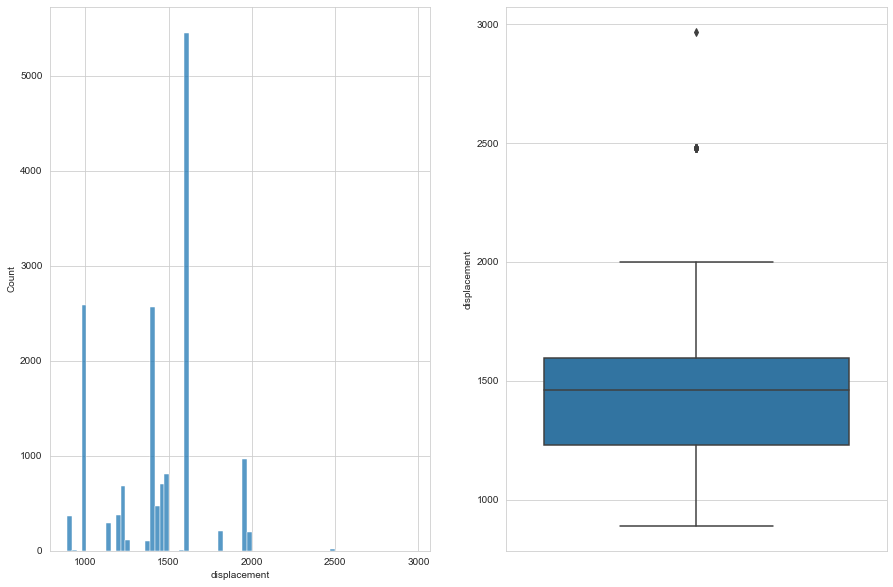

In [72]:
plt.figure(figsize=(15,10))
plt.subplot(1,2,1)
sns.histplot(x="displacement",data=df)

plt.subplot(1,2,2)
sns.boxplot(y="displacement",data=df)

## drive_chain

In [73]:
df.drive_chain.value_counts(dropna = False)

front    15712
4WD        203
rear         4
Name: drive_chain, dtype: int64

<AxesSubplot:xlabel='drive_chain', ylabel='count'>

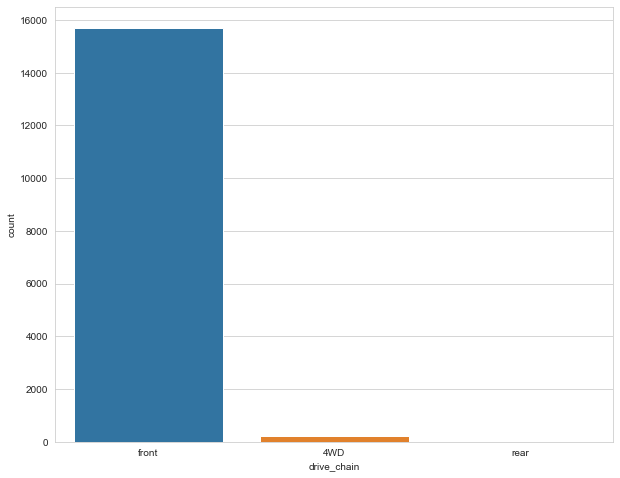

In [74]:
plt.figure(figsize=(10,8))
sns.countplot(x="drive_chain",data=df)

## fuel

In [75]:
df.fuel.value_counts(dropna = False)


Benzine     8551
Diesel      7299
LPG/CNG       64
Electric       5
Name: fuel, dtype: int64

<AxesSubplot:xlabel='fuel', ylabel='count'>

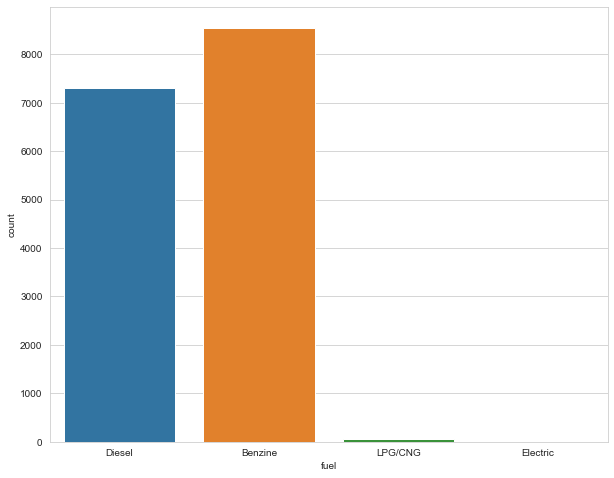

In [76]:
plt.figure(figsize=(10,8))
sns.countplot(x="fuel",data=df)

## comfort_&_convenience

In [77]:
df["comfort_&_convenience"].value_counts(dropna = False)

Air conditioning,Electrical side mirrors,Hill Holder,Power windows                                                                                                                                                                                                                                                                                                                                                                                                                                   389
Air conditioning,Armrest,Automatic climate control,Cruise control,Electrically adjustable seats,Electrical side mirrors,Electric tailgate,Heated steering wheel,Hill Holder,Keyless central door lock,Leather steering wheel,Light sensor,Lumbar support,Multi-function steering wheel,Navigation system,Park Distance Control,Parking assist system camera,Parking assist system sensors front,Parking assist system sensors rear,Power windows,Rain sensor,Seat heating,Start-stop system          259
Air conditioning,Cruis

## extras

In [78]:
df["extras"].value_counts(dropna = False)

Alloy wheels                                                                                               6174
Alloy wheels,Touch screen                                                                                   697
Alloy wheels,Voice Control                                                                                  577
Alloy wheels,Touch screen,Voice Control                                                                     541
Alloy wheels,Roof rack                                                                                      385
                                                                                                           ... 
Alloy wheels,Catalytic Converter,Shift paddles,Sport package,Sport seats,Sport suspension,Voice Control       1
Alloy wheels,Catalytic Converter,Roof rack,Sport package,Sport seats,Trailer hitch                            1
Alloy wheels,Catalytic Converter,Ski bag,Sport package,Voice Control                                    

## safety_&_security

In [79]:
df["safety_&_security"].value_counts(dropna = False)

ABS,Central door lock,Daytime running lights,Driver-side airbag,Electronic stability control,Fog lights,Immobilizer,Isofix,Passenger-side airbag,Power steering,Side airbag,Tire pressure monitoring system,Traction control                                                                                                                                      825
ABS,Central door lock,Daytime running lights,Driver-side airbag,Electronic stability control,Immobilizer,Isofix,Passenger-side airbag,Power steering,Side airbag,Tire pressure monitoring system,Traction control                                                                                                                                                 480
ABS,Central door lock,Daytime running lights,Driver-side airbag,Electronic stability control,Fog lights,Immobilizer,Isofix,LED Daytime Running Lights,Passenger-side airbag,Power steering,Side airbag,Tire pressure monitoring system,Traction control                                     

## gears

In [80]:
fill_most(df,"make_model","gears")

In [81]:
df["gears"].value_counts(dropna = False)

6.0     9362
5.0     4411
7.0     1908
8.0      224
9.0        6
1.0        2
3.0        2
4.0        2
2.0        1
50.0       1
Name: gears, dtype: int64

In [82]:
df[df["gears"] == np.nan]

,make_model,body_type,price,vat,km,hp,type,previous_owners,inspection_new,body_color,upholstery,nr_of_doors,nr_of_seats,gearing_type,displacement,drive_chain,fuel,comfort_&_convenience,entertainment_&_media,extras,safety_&_security,gears,age,consumption_comb


In [83]:
df[df["gears"] == 50]


,make_model,body_type,price,vat,km,hp,type,previous_owners,inspection_new,body_color,upholstery,nr_of_doors,nr_of_seats,gearing_type,displacement,drive_chain,fuel,comfort_&_convenience,entertainment_&_media,extras,safety_&_security,gears,age,consumption_comb
14495,Renault Clio,Sedans,10798,VAT deductible,10.0,56.0,New,1.0,0,Black,Cloth,5.0,5.0,Manual,898.0,front,Benzine,"Air conditioning,Cruise control,Electrical sid...",USB,Alloy wheels,"ABS,Central door lock,Daytime running lights,D...",50.0,1.0,5.2


In [84]:
df["gears"][df["gears"].index ==14495] = 5
df[df["gears"] == 50]

,make_model,body_type,price,vat,km,hp,type,previous_owners,inspection_new,body_color,upholstery,nr_of_doors,nr_of_seats,gearing_type,displacement,drive_chain,fuel,comfort_&_convenience,entertainment_&_media,extras,safety_&_security,gears,age,consumption_comb


In [85]:
df[df["make_model"] == "Renault Clio"]

,make_model,body_type,price,vat,km,hp,type,previous_owners,inspection_new,body_color,upholstery,nr_of_doors,nr_of_seats,gearing_type,displacement,drive_chain,fuel,comfort_&_convenience,entertainment_&_media,extras,safety_&_security,gears,age,consumption_comb
13055,Renault Clio,Compact,7650,VAT deductible,161556.0,66.0,Used,1.0,0,White,Cloth,4.0,5.0,Automatic,1461.0,front,Diesel,"Air conditioning,Cruise control,Electrical sid...","Bluetooth,On-board computer,Radio,USB","Alloy wheels,Touch screen,Voice Control","ABS,Central door lock,Daytime running lights,D...",5.0,4.0,3.5
13056,Renault Clio,Station wagon,13100,VAT deductible,22000.0,66.0,Used,1.0,0,White,Part/Full Leather,5.0,5.0,Automatic,1461.0,front,Diesel,"Air conditioning,Armrest,Automatic climate con...","Bluetooth,Digital radio,Hands-free equipment,M...","Alloy wheels,Sport package,Touch screen,Voice ...","ABS,Central door lock,Central door lock with r...",6.0,4.0,3.5
13057,Renault Clio,Sedans,13000,Price negotiable,33000.0,66.0,Used,1.0,0,Black,Cloth,5.0,5.0,Automatic,1461.0,front,Diesel,"Air conditioning,Automatic climate control,Ele...","Bluetooth,MP3,USB",Alloy wheels,"ABS,Central door lock with remote control,Driv...",6.0,4.0,3.5
13058,Renault Clio,Station wagon,12790,VAT deductible,29830.0,66.0,Used,1.0,0,Grey,Cloth,5.0,5.0,Automatic,1461.0,front,Diesel,"Air conditioning,Automatic climate control,Cru...","CD player,On-board computer",Alloy wheels,"ABS,Central door lock,Driver-side airbag,Elect...",6.0,3.0,3.5
13059,Renault Clio,Sedans,11490,VAT deductible,66222.0,67.0,Used,1.0,0,Grey,Cloth,5.0,5.0,Automatic,1461.0,front,Diesel,"Air conditioning,Automatic climate control,Cru...","Bluetooth,On-board computer,Radio",Alloy wheels,"ABS,Central door lock,Daytime running lights,D...",5.0,4.0,3.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14889,Renault Clio,Station wagon,10890,VAT deductible,10.0,55.0,New,1.0,0,Blue,Cloth,5.0,5.0,Manual,898.0,front,Benzine,"Air conditioning,Cruise control,Electrical sid...","Bluetooth,Hands-free equipment,On-board comput...",Catalytic Converter,"ABS,Central door lock,Daytime running lights,D...",5.0,1.0,5.0
14890,Renault Clio,Sedans,10890,VAT deductible,50.0,56.0,New,1.0,0,White,Cloth,5.0,5.0,Manual,898.0,front,Benzine,"Air conditioning,Cruise control,Electrical sid...","Bluetooth,Hands-free equipment,MP3,On-board co...",Alloy wheels,"ABS,Central door lock,Daytime running lights,D...",5.0,1.0,5.0
14891,Renault Clio,Compact,10880,VAT deductible,150.0,56.0,Used,1.0,0,White,Cloth,4.0,5.0,Manual,898.0,front,Benzine,"Air conditioning,Cruise control,Electrical sid...","Bluetooth,Hands-free equipment,On-board comput...",Alloy wheels,"ABS,Central door lock,Daytime running lights,D...",5.0,1.0,5.0
14892,Renault Clio,Compact,10890,VAT deductible,11.0,56.0,Used,1.0,0,Red,Cloth,5.0,5.0,Manual,898.0,front,Benzine,"Air conditioning,Cruise control,Multi-function...","Bluetooth,Hands-free equipment,On-board comput...",Alloy wheels,"ABS,Central door lock,Daytime running lights,D...",5.0,1.0,5.0


In [86]:
df[df["gears"] == 2]

,make_model,body_type,price,vat,km,hp,type,previous_owners,inspection_new,body_color,upholstery,nr_of_doors,nr_of_seats,gearing_type,displacement,drive_chain,fuel,comfort_&_convenience,entertainment_&_media,extras,safety_&_security,gears,age,consumption_comb
9812,Opel Corsa,Sedans,9880,VAT deductible,19247.0,51.0,Used,1.0,0,Grey,Cloth,5.0,5.0,Manual,1229.0,front,Benzine,"Air conditioning,Light sensor,Navigation syste...","Bluetooth,On-board computer",Alloy wheels,"ABS,Central door lock,Driver-side airbag,Fog l...",2.0,2.0,5.2


In [87]:
df["gears"][df["gears"].index ==9812] = 5
df[df["gears"] == 2]

,make_model,body_type,price,vat,km,hp,type,previous_owners,inspection_new,body_color,upholstery,nr_of_doors,nr_of_seats,gearing_type,displacement,drive_chain,fuel,comfort_&_convenience,entertainment_&_media,extras,safety_&_security,gears,age,consumption_comb


In [88]:
df[df["gears"] == 4]

,make_model,body_type,price,vat,km,hp,type,previous_owners,inspection_new,body_color,upholstery,nr_of_doors,nr_of_seats,gearing_type,displacement,drive_chain,fuel,comfort_&_convenience,entertainment_&_media,extras,safety_&_security,gears,age,consumption_comb
15822,Renault Espace,Van,50950,VAT deductible,11.0,165.0,New,1.0,0,Grey,Cloth,5.0,5.0,Automatic,1798.0,front,Benzine,"Air conditioning,Armrest,Automatic climate con...","Digital radio,Radio","Alloy wheels,Voice Control","ABS,Daytime running lights,Driver-side airbag,...",4.0,1.0,7.6
15823,Renault Espace,Van,50950,VAT deductible,11.0,165.0,New,1.0,0,Grey,Cloth,5.0,5.0,Automatic,1798.0,front,Benzine,"Air conditioning,Armrest,Automatic climate con...","Digital radio,Radio","Alloy wheels,Voice Control","ABS,Daytime running lights,Driver-side airbag,...",4.0,1.0,7.6


In [89]:
df["gears"][df["gears"].index ==15822] = 7
df["gears"][df["gears"].index ==15823] = 7
df[df["gears"] == 4]

,make_model,body_type,price,vat,km,hp,type,previous_owners,inspection_new,body_color,upholstery,nr_of_doors,nr_of_seats,gearing_type,displacement,drive_chain,fuel,comfort_&_convenience,entertainment_&_media,extras,safety_&_security,gears,age,consumption_comb


In [90]:
df[df["gears"] == 3]

,make_model,body_type,price,vat,km,hp,type,previous_owners,inspection_new,body_color,upholstery,nr_of_doors,nr_of_seats,gearing_type,displacement,drive_chain,fuel,comfort_&_convenience,entertainment_&_media,extras,safety_&_security,gears,age,consumption_comb
15817,Renault Espace,Van,54204,VAT deductible,11.0,146.0,New,1.0,0,White,Part/Full Leather,5.0,5.0,Automatic,1997.0,front,Diesel,"Air conditioning,Armrest,Automatic climate con...","Digital radio,Radio","Alloy wheels,Voice Control","ABS,Daytime running lights,Driver-side airbag,...",3.0,1.0,5.4
15845,Renault Espace,Van,46660,VAT deductible,11.0,118.0,New,1.0,0,White,Part/Full Leather,5.0,5.0,Automatic,1997.0,front,Diesel,"Air conditioning,Armrest,Automatic climate con...","Digital radio,Radio","Alloy wheels,Voice Control","ABS,Daytime running lights,Driver-side airbag,...",3.0,1.0,5.1


In [91]:
df["gears"][df["gears"].index ==15817] = 7
df["gears"][df["gears"].index ==15845] = 7
df[df["gears"] == 3]

,make_model,body_type,price,vat,km,hp,type,previous_owners,inspection_new,body_color,upholstery,nr_of_doors,nr_of_seats,gearing_type,displacement,drive_chain,fuel,comfort_&_convenience,entertainment_&_media,extras,safety_&_security,gears,age,consumption_comb


In [92]:
df[df["gears"] == 1]

,make_model,body_type,price,vat,km,hp,type,previous_owners,inspection_new,body_color,upholstery,nr_of_doors,nr_of_seats,gearing_type,displacement,drive_chain,fuel,comfort_&_convenience,entertainment_&_media,extras,safety_&_security,gears,age,consumption_comb
8921,Opel Corsa,Compact,11000,VAT deductible,24000.0,66.0,Used,1.0,0,Blue,Cloth,5.0,5.0,Semi-automatic,1398.0,front,Benzine,"Air conditioning,Light sensor,Multi-function s...","Bluetooth,On-board computer,Radio,USB","Alloy wheels,Touch screen","ABS,Central door lock,Central door lock with r...",1.0,2.0,4.8
14375,Renault Clio,Compact,23990,Price negotiable,10.0,147.0,Used,1.0,0,White,Cloth,4.0,5.0,Automatic,1618.0,front,Benzine,"Air conditioning,Automatic climate control,Cru...","Bluetooth,Hands-free equipment,On-board computer","Alloy wheels,Sport package,Sport seats,Sport s...","ABS,Central door lock,Daytime running lights,D...",1.0,2.0,3.3


In [93]:
df["gears"][df["gears"].index ==8921] = 5
df["gears"][df["gears"].index ==14375] = 6
df[df["gears"] == 1]

,make_model,body_type,price,vat,km,hp,type,previous_owners,inspection_new,body_color,upholstery,nr_of_doors,nr_of_seats,gearing_type,displacement,drive_chain,fuel,comfort_&_convenience,entertainment_&_media,extras,safety_&_security,gears,age,consumption_comb


In [94]:
df[df["gears"] == np.nan]

,make_model,body_type,price,vat,km,hp,type,previous_owners,inspection_new,body_color,upholstery,nr_of_doors,nr_of_seats,gearing_type,displacement,drive_chain,fuel,comfort_&_convenience,entertainment_&_media,extras,safety_&_security,gears,age,consumption_comb


In [95]:
df["gears"].value_counts()

6.0    9363
5.0    4414
7.0    1912
8.0     224
9.0       6
Name: gears, dtype: int64

## age

In [96]:
df["age"].value_counts(dropna = False)

2.0    4522
1.0    4450
4.0    3674
3.0    3273
Name: age, dtype: int64

<AxesSubplot:xlabel='age', ylabel='Count'>

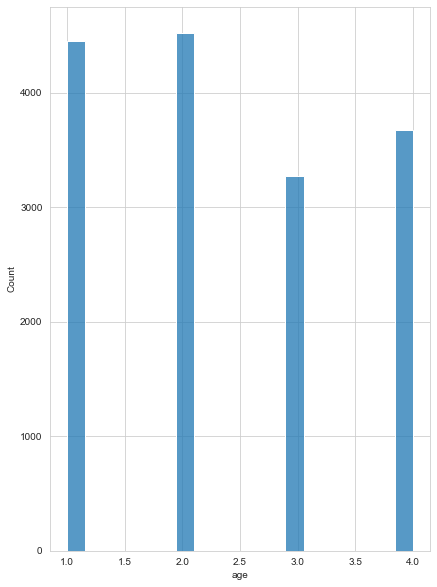

In [97]:
plt.figure(figsize=(15,10))
plt.subplot(1,2,1)
sns.histplot(x="age",data=df)

## consumption_comb

In [98]:
df["consumption_comb"].value_counts(dropna = False)

4.5    1120
4.0    1112
5.2     965
5.7     845
4.8     814
4.7     740
3.9     732
5.4     663
5.1     630
3.3     629
4.4     595
3.8     585
5.6     568
5.0     520
4.6     420
4.2     408
5.3     375
3.7     369
4.9     348
5.5     342
4.1     341
5.9     308
4.3     295
3.5     288
6.0     278
3.6     194
6.2     184
5.8     142
6.3     141
6.1     135
6.8     134
6.6     119
3.4     106
3.0      73
6.4      64
7.4      62
7.1      38
1.0      38
6.5      36
6.7      33
3.2      25
6.9      21
8.3      20
7.6      14
7.0       9
3.1       7
7.8       6
7.2       6
8.0       5
8.6       3
8.7       3
8.1       2
7.3       2
7.9       2
0.0       2
7.5       1
9.1       1
1.2       1
Name: consumption_comb, dtype: int64

In [99]:
df["consumption_comb"].sort_values().head(55)

8217    0.0
10566   0.0
14912   1.0
14906   1.0
535     1.0
13894   1.0
14905   1.0
10513   1.0
14903   1.0
14902   1.0
14901   1.0
14900   1.0
14899   1.0
14898   1.0
14897   1.0
14896   1.0
14895   1.0
14894   1.0
14907   1.0
14927   1.0
14904   1.0
14908   1.0
14913   1.0
14914   1.0
14915   1.0
14916   1.0
14917   1.0
14911   1.0
2801    1.0
14926   1.0
14910   1.0
14919   1.0
14920   1.0
14921   1.0
14918   1.0
14924   1.0
14909   1.0
14923   1.0
14925   1.0
14922   1.0
13678   1.2
11106   3.0
6874    3.0
6873    3.0
1025    3.0
6173    3.0
6136    3.0
10740   3.0
8805    3.0
13577   3.0
8762    3.0
13257   3.0
8731    3.0
13256   3.0
13251   3.0
Name: consumption_comb, dtype: float64

In [100]:
df['consumption_comb'][df["consumption_comb"].isin([0.00, 1.00, 1.20, 1.60])]= np.nan ## bukadar duşük yakan araba olamaz.

In [101]:
fill_most(df,"make_model","consumption_comb")

In [102]:
df["consumption_comb"].value_counts(dropna = False)

4.5    1155
4.0    1113
5.2     965
5.7     847
4.8     815
4.7     740
3.9     732
5.4     663
3.3     631
5.1     630
4.4     595
3.8     585
5.6     568
5.0     520
4.6     420
4.2     408
5.3     375
3.7     369
4.9     348
5.5     342
4.1     341
5.9     308
4.3     295
3.5     288
6.0     278
3.6     194
6.2     184
5.8     142
6.3     141
6.1     135
6.8     134
6.6     119
3.4     106
3.0      73
6.4      64
7.4      62
7.1      38
6.5      36
6.7      33
3.2      25
6.9      21
8.3      20
7.6      14
7.0       9
3.1       7
7.8       6
7.2       6
8.0       5
8.6       3
8.7       3
7.3       2
8.1       2
7.9       2
7.5       1
9.1       1
Name: consumption_comb, dtype: int64

In [103]:
df[df["consumption_comb"]== 9.1] 

,make_model,body_type,price,vat,km,hp,type,previous_owners,inspection_new,body_color,upholstery,nr_of_doors,nr_of_seats,gearing_type,displacement,drive_chain,fuel,comfort_&_convenience,entertainment_&_media,extras,safety_&_security,gears,age,consumption_comb
10771,Opel Insignia,Station wagon,12000,Price negotiable,185000.0,100.0,Used,1.0,0,White,Cloth,5.0,5.0,Automatic,2967.0,front,Diesel,"Air conditioning,Armrest,Automatic climate con...","Bluetooth,CD player,Digital radio,Hands-free e...","Alloy wheels,Catalytic Converter,Roof rack,Ski...","ABS,Adaptive Cruise Control,Adaptive headlight...",6.0,4.0,9.1


<AxesSubplot:ylabel='consumption_comb'>

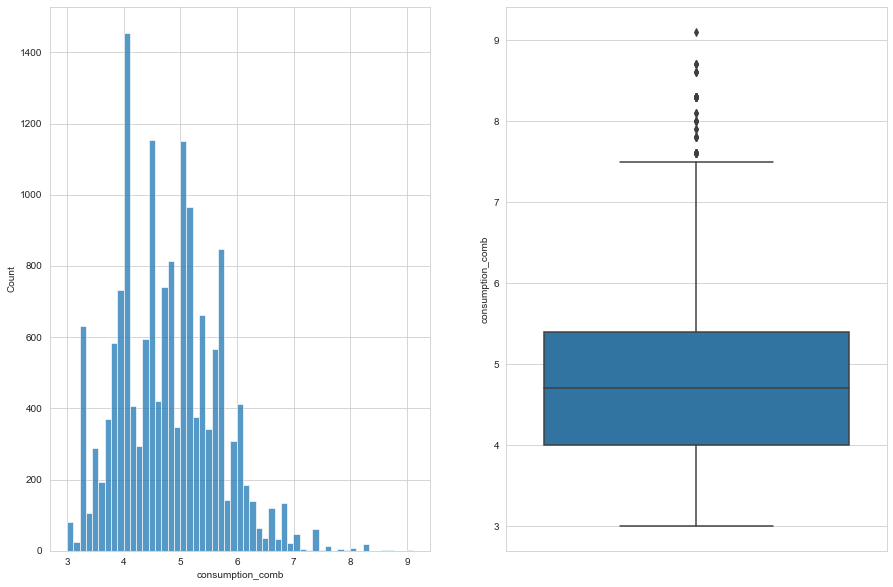

In [104]:
plt.figure(figsize=(15,10))
plt.subplot(1,2,1)
sns.histplot(x="consumption_comb",data=df)

plt.subplot(1,2,2)
sns.boxplot(y="consumption_comb",data=df)

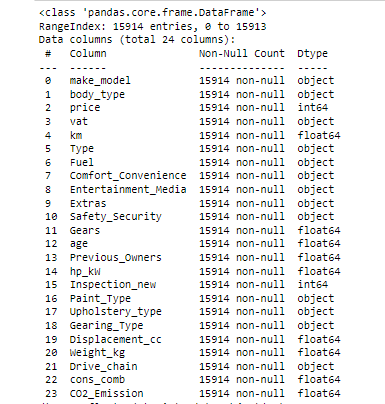

In [105]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15919 entries, 0 to 15918
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   make_model             15919 non-null  object 
 1   body_type              15919 non-null  object 
 2   price                  15919 non-null  int64  
 3   vat                    15919 non-null  object 
 4   km                     15919 non-null  float64
 5   hp                     15919 non-null  float64
 6   type                   15919 non-null  object 
 7   previous_owners        15919 non-null  float64
 8   inspection_new         15919 non-null  int64  
 9   body_color             15919 non-null  object 
 10  upholstery             15919 non-null  object 
 11  nr_of_doors            15919 non-null  float64
 12  nr_of_seats            15919 non-null  float64
 13  gearing_type           15919 non-null  object 
 14  displacement           15919 non-null  float64
 15  dr

In [106]:
df.isnull().sum()*100/df.shape[0]

make_model              0.0
body_type               0.0
price                   0.0
vat                     0.0
km                      0.0
hp                      0.0
type                    0.0
previous_owners         0.0
inspection_new          0.0
body_color              0.0
upholstery              0.0
nr_of_doors             0.0
nr_of_seats             0.0
gearing_type            0.0
displacement            0.0
drive_chain             0.0
fuel                    0.0
comfort_&_convenience   0.0
entertainment_&_media   0.0
extras                  0.0
safety_&_security       0.0
gears                   0.0
age                     0.0
consumption_comb        0.0
dtype: float64

In [107]:
df = df.join(df["comfort_&_convenience"].str.get_dummies(sep=",").add_prefix("cc_"))
df = df.join(df["entertainment_&_media"].str.get_dummies(sep=",").add_prefix("em_"))
df = df.join(df["extras"].str.get_dummies(sep = ",").add_prefix("ex_"))
df = df.join(df["safety_&_security"].str.get_dummies(sep=",").add_prefix("ss_"))

In [108]:
df.shape

(15919, 118)

In [109]:
df.drop(["comfort_&_convenience", "entertainment_&_media", "extras", "safety_&_security"], axis=1, inplace=True)

In [110]:
df_final = pd.get_dummies(df, drop_first=True)

In [111]:
df_final.shape

(15919, 143)

In [112]:
df_final

,price,km,hp,previous_owners,inspection_new,nr_of_doors,nr_of_seats,displacement,gears,age,consumption_comb,cc_Air conditioning,cc_Air suspension,cc_Armrest,cc_Automatic climate control,cc_Auxiliary heating,cc_Cruise control,cc_Electric Starter,cc_Electric tailgate,cc_Electrical side mirrors,cc_Electrically adjustable seats,cc_Electrically heated windshield,cc_Heads-up display,cc_Heated steering wheel,cc_Hill Holder,cc_Keyless central door lock,cc_Leather seats,cc_Leather steering wheel,cc_Light sensor,cc_Lumbar support,cc_Massage seats,cc_Multi-function steering wheel,cc_Navigation system,cc_Panorama roof,cc_Park Distance Control,cc_Parking assist system camera,cc_Parking assist system self-steering,cc_Parking assist system sensors front,cc_Parking assist system sensors rear,cc_Power windows,cc_Rain sensor,cc_Seat heating,cc_Seat ventilation,cc_Split rear seats,cc_Start-stop system,cc_Sunroof,cc_Tinted windows,cc_Wind deflector,cc_Windshield,em_Bluetooth,...,ss_LED Daytime Running Lights,ss_LED Headlights,ss_Lane departure warning system,ss_Night view assist,ss_Passenger-side airbag,ss_Power steering,ss_Rear airbag,ss_Side airbag,ss_Tire pressure monitoring system,ss_Traction control,ss_Traffic sign recognition,ss_Xenon headlights,make_model_Audi A2,make_model_Audi A3,make_model_Opel Astra,make_model_Opel Corsa,make_model_Opel Insignia,make_model_Renault Clio,make_model_Renault Duster,make_model_Renault Espace,body_type_Convertible,body_type_Coupe,body_type_Off-Road,body_type_Sedans,body_type_Station wagon,body_type_Transporter,body_type_Van,vat_VAT deductible,type_Used,body_color_Black,body_color_Blue,body_color_Bronze,body_color_Brown,body_color_Gold,body_color_Green,body_color_Grey,body_color_Orange,body_color_Red,body_color_Silver,body_color_Violet,body_color_White,body_color_Yellow,upholstery_Part/Full Leather,gearing_type_Manual,gearing_type_Semi-automatic,drive_chain_front,drive_chain_rear,fuel_Diesel,fuel_Electric,fuel_LPG/CNG
0,15770,56013.0,66.0,2.0,1,5.0,5.0,1422.0,6.0,4.0,3.8,1,0,1,1,0,1,0,0,1,0,0,0,0,1,0,0,1,1,0,0,1,1,0,1,0,0,0,1,1,1,1,0,0,1,0,0,0,0,1,...,0,0,0,0,1,1,0,1,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0
1,14500,80000.0,141.0,1.0,0,3.0,4.0,1798.0,7.0,3.0,5.6,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,1,0,0,1,...,0,0,0,0,1,1,0,1,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0
2,14640,83450.0,85.0,1.0,0,4.0,4.0,1598.0,6.0,4.0,3.8,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,1,0,1,0,0,1,1,1,0,1,0,0,1,0,0,0,0,0,...,0,0,0,0,1,1,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0
3,14500,73000.0,66.0,1.0,0,3.0,4.0,1422.0,6.0,4.0,3.8,0,1,1,0,1,0,0,0,1,0,0,1,0,1,0,0,1,1,1,0,1,1,0,0,0,0,0,0,1,1,1,0,1,1,0,0,0,0,1,...,0,0,0,0,1,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0
4,16790,16200.0,66.0,1.0,1,5.0,5.0,1422.0,6.0,4.0,4.1,1,0,1,1,0,0,0,0,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,1,0,0,0,1,1,1,0,0,0,1,0,0,0,0,1,...,0,0,0,0,1,1,0,1,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15914,39950,10.0,147.0,1.0,0,5.0,5.0,1997.0,6.0,1.0,5.3,1,0,0,1,0,1,0,0,1,1,0,0,0,1,1,0,1,1,0,1,1,1,0,1,0,0,1,1,1,1,0,0,1,1,0,1,0,0,1,...,1,1,1,0,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,1,0,0
15915,39885,9900.0,165.0,1.0,0,5.0,5.0,1798.0,7.0,1.0,4.7,1,0,0,1,0,1,0,1,1,0,1,1,1,1,1,0,1,1,1,0,0,1,0,1,1,1,1,1,1,1,1,0,0,0,1,0,0,0,1,...,1,1,1,0,1,1,0,1,1,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,1,0,0,0

In [113]:
df_final.to_csv("final_scout_dummy_oguzhan.csv", index=False)